# **HW2**


## **Handwritten Digits Dataset (scikit-learn)**
*   1797 instances
*   64 numerical features (intensity of 8x8 pixels)
*   10 classes (digits from 0 to 9)

![alt text](https://drive.google.com/uc?id=1JFgt0u6aIW8noh2saWgRTf9YtUTUTfbV)

1. Import scikit-learn libraries

In [33]:
import sklearn

2. Load handwritten digits dataset (using load_digits()) and divide it into training (80%) and test (20%) datasets 

In [34]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2)

In [36]:
X_train.shape

(1437, 64)

3. Import torch libraries

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

4. Prepare PyTorch Dataset and DataLoader for digits dataset

In [38]:
tr_dataset = TensorDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train))
ts_dataset = TensorDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test))

In [39]:
train_loader = DataLoader(dataset=tr_dataset, batch_size=16)
test_loader = DataLoader(dataset=ts_dataset, batch_size=16)

In [40]:
X, y = next(iter(train_loader))

5. Define a simple network with one input layer, two hidden layers (HL1, HL2), and one output layer (OL)

*   H1: 32 neurons with ReLU activation
*   H2: 64 neurons with ReLU activation
*   OL: 10 neurons with Softmax activation


In [41]:
class SimpleNetwork2(nn.Module):
  def __init__(self, input_dim, hidden1_dim, hidden2_dim, output_dim):
    super(SimpleNetwork2, self).__init__()
    self.layers = nn.Sequential(
        nn.Linear(input_dim, hidden1_dim),
        nn.ReLU(),
        nn.Linear(hidden1_dim, hidden2_dim),
        nn.ReLU(),
        nn.Linear(hidden2_dim, output_dim),
        nn.Softmax(dim=1),
    )

  def forward(self, x):
    x = self.layers(x)
    return x

In [42]:
my_model = SimpleNetwork2(64, 32, 64, 10)
print(my_model)

SimpleNetwork2(
  (layers): Sequential(
    (0): Linear(in_features=64, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
    (5): Softmax(dim=1)
  )
)


6. Train the simple network with the following hyperparameters and settings:

*   Number of Epochs: 50
*   Learning rate: 0.01
*   Loss function: Cross Entropy
*   Optimization: Stochastic Gradient Descent



In [43]:
learning_rate = 0.01
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(my_model.parameters(), lr=learning_rate, momentum=0.9)

In [44]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [45]:
num_epochs = 50

my_model.to(device)
my_model.train()

errors = []
for epoch in range(num_epochs):
 
  for X, y in train_loader:

    X = X.to(device)
    y = y.to(device)

    optimizer.zero_grad()     # zero the gradients (by default it adds up)

    output = my_model(X)
    loss = loss_fn(output, y)

    loss.backward()           # backpropgate the loss
    optimizer.step()          # update parameters
    errors.append(loss.item())

7. Evaluate the model performance on the test dataset using accuracy

In [46]:
import matplotlib.pyplot as plt

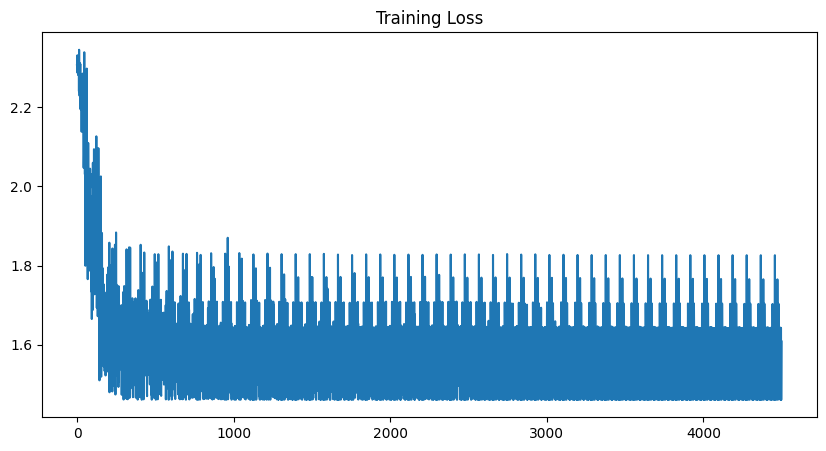

In [47]:
plt.figure(figsize=(10,5))
plt.title('Training Loss')
plt.plot(errors)
plt.show()

In [48]:
def test_model(model, data_loader):
  model.eval()         # Set the model to evaluation mode

  correct = 0
  n = 0
  with torch.no_grad():   # disable gradient calculation, reduce memory usage 
    for x, y in data_loader:

      x = x.to(device)
      y = y.to(device)

      # zero the gradients
      optimizer.zero_grad()

      output = model(x)
      _, pred = torch.max(output, 1)

      correct += torch.sum(pred == y).item()
      n += y.size(0)

  acc = correct / n

  return acc

In [49]:
acc_tr = test_model(my_model, train_loader)
acc_ts = test_model(my_model, test_loader)

print("Training Accuracy =", acc_tr)
print("Test Accuracy =", acc_ts)

Training Accuracy = 0.894919972164231
Test Accuracy = 0.8805555555555555


8. Train the simple network with the following hyperparameters and settings:

*   Number of Epochs: 50
*   Learning rate: 0.001
*   Loss function: Cross Entropy
*   Optimization: Adaptive Moment Estimation (Adam)

In [50]:
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(my_model.parameters(), lr=learning_rate)

In [51]:
num_epochs = 50

my_model.to(device)
my_model.train()

errors = []
for epoch in range(num_epochs):
 
  for X, y in train_loader:

    X = X.to(device)
    y = y.to(device)

    optimizer.zero_grad()     # zero the gradients (by default it adds up)

    output = my_model(X)
    loss = loss_fn(output, y)

    loss.backward()           # backpropgate the loss
    optimizer.step()          # update parameters
    errors.append(loss.item())

In [52]:
acc_tr = test_model(my_model, train_loader)
acc_ts = test_model(my_model, test_loader)

print("Training Accuracy =", acc_tr)
print("Test Accuracy =", acc_ts)

Training Accuracy = 0.9958246346555324
Test Accuracy = 0.9833333333333333
